In [5]:
import skimage.io
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

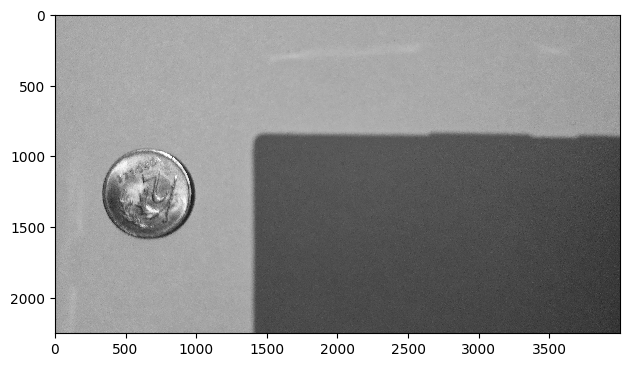

In [ ]:
image = skimage.io.imread("data/20241117_213835.jpg")
image = rgb2gray(image)
skimage.io.imshow(image)

Text(0.5, 1.0, 'FFT')

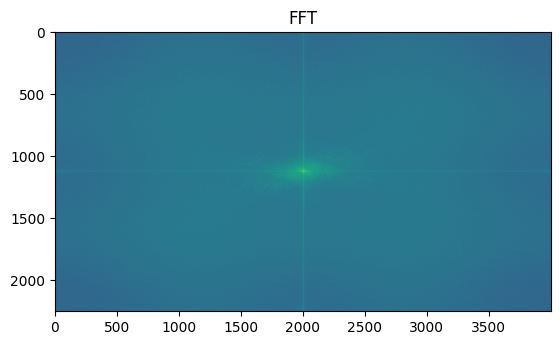

In [ ]:
fft_image = np.fft.fftshift(np.fft.fft2(image))
plt.imshow(np.log(abs(fft_image)), cmap="gray")
plt.title("FFT")

In [ ]:
# fft_image[0, 0] = 1
# fft_image[0, 0]

np.complex128(1+0j)

In [ ]:
def gaussuian_mask(shape, sigma=90):
    mask = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            mask[i, j] = np.exp(
                -((i - shape[0] // 2) ** 2 + (j - shape[1] // 2) ** 2) / (2 * sigma**2)
            )
    return mask


def convolve(image, kernel):
    return np.fft.ifft2(np.fft.ifftshift(np.fft.fft2(image) * np.fft.fftshift(kernel)))


mask = gaussuian_mask(image.shape, 90)

Text(0.5, 1.0, 'Mask')

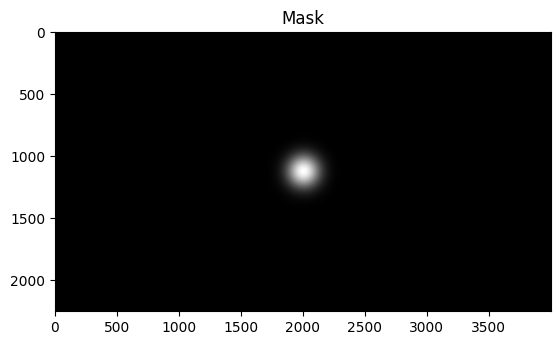

In [34]:
plt.imshow(mask, cmap="gray")
plt.title("Mask")

/tmp/ipykernel_19433/1570560725.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(filtered)), cmap="gray")


Text(0.5, 1.0, 'FFT')

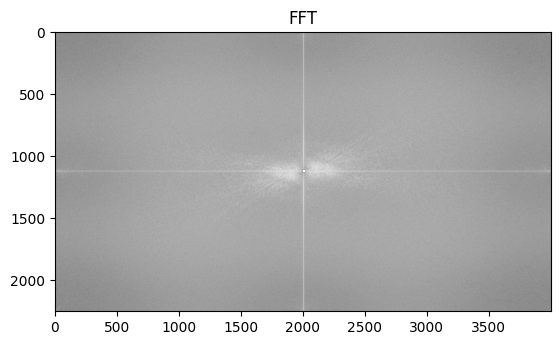

In [ ]:
filtered = fft_image * (1 - mask)

plt.imshow(np.log(abs(filtered)), cmap="gray")
plt.title("FFT")

Text(0.5, 1.0, 'Transformed Cargo Ship in Grayscale')

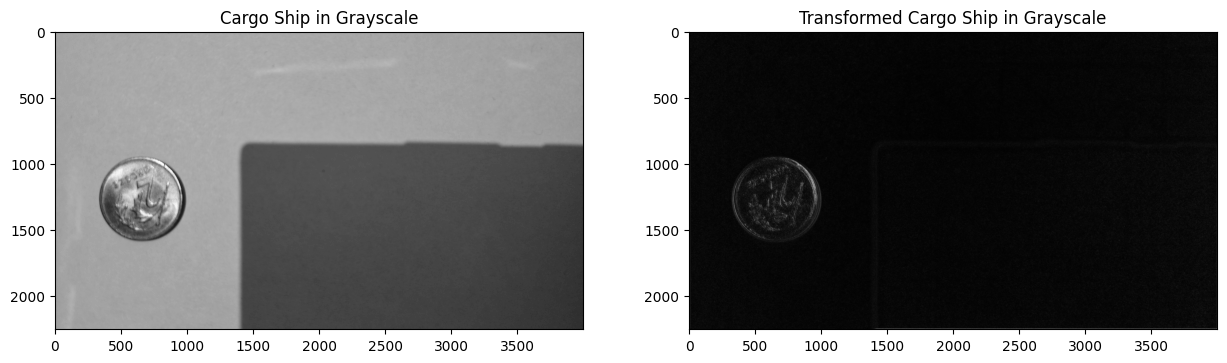

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Cargo Ship in Grayscale")
ax[1].imshow(abs(np.fft.ifft2(filtered)), cmap="gray")
ax[1].set_title("Transformed Cargo Ship in Grayscale")